In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 10]

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [61]:
df = pd.read_csv("data/frameWithNewFeatures.csv")

In [62]:
print(df.shape)
df[['time','id_label','mood', 'avgMood', 'avgValence', 'avgActivity', 'avgArousal', 
    'avgScreen', 'avgAppSum', 'avgCallSMS', 'weekend']].head()

(1162, 33)


,time,id_label,mood,avgMood,avgValence,avgActivity,avgArousal,avgScreen,avgAppSum,avgCallSMS,weekend
0,3/23/14,AS14.01,6.80,6.495700,0.506915,0.137137,0.151986,6634.1688,1640.5368,2.2,1.0
1,3/24/14,AS14.01,6.00,6.429033,0.440248,0.134836,0.311986,9643.6390,2480.6562,4.2,0.0
2,3/25/14,AS14.01,6.75,6.430000,0.400000,0.138201,0.460000,13483.5212,2646.4742,4.2,0.0
3,3/26/14,AS14.01,6.60,6.510000,0.480000,0.131653,0.380000,13172.5000,2643.7906,3.0,0.0
4,3/27/14,AS14.01,7.00,6.630000,0.540000,0.116179,0.300000,15432.4978,2852.1434,2.8,0.0


## Selecting 20 users for training, 7 users for testing

In [4]:
users_amount = df.id_label.nunique()
0.75 * users_amount # amount of users for testing -> 20

20.25

In [6]:
np.random.seed(7)
training = np.random.choice(27,20,replace=False) # randomly select users for training set
training

array([ 2,  9,  1,  5, 17, 16, 13, 23, 18, 11, 12, 26,  0, 25,  6, 21, 24,
       10, 20,  8])

In [7]:
# selecting rows for training and testing
df_training = df.loc[df['id'].isin(training)]
df_testing = df.loc[~df['id'].isin(training)]
df_training.shape, df_testing.shape

((846, 33), (316, 33))

## Selecting percentage of all users' data for training & testing

In [ ]:
# TODO

## Tree Models

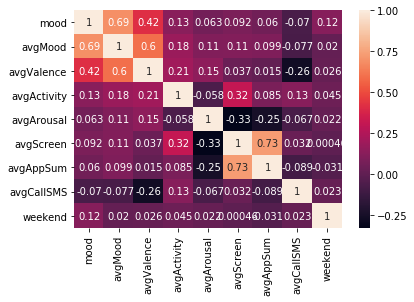

In [8]:
corr = df[['mood', 'avgMood', 'avgValence', 'avgActivity', 'avgArousal', 
           'avgScreen', 'avgAppSum', 'avgCallSMS', 'weekend']].corr()
sns.heatmap(data=corr, annot=True)
plt.savefig('corr_matrix.png')

In [45]:
# define used features
features = ['avgMood', 'avgArousal', 'avgActivity', 'avgAppSum', 'avgCallSMS', 'weekend']
X = df_training[features]
y = df_training['mood']

In [46]:
# split full training data to train & validation data
np.random.seed(7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [47]:
np.random.seed(7)
models = [DecisionTreeRegressor(max_depth=10), 
          RandomForestRegressor(max_depth=10, n_estimators=100), 
          GradientBoostingRegressor(max_depth=10, n_estimators=100)]

for i, m in enumerate(models):
    tree = m
    tree_model = tree.fit(X_train, y_train)
    y_pred = tree_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    #for importance, feature in zip(tree_model.feature_importances_, features):
    #    print(importance, feature)
    print(rmse)

0.5857629930559031
0.36759435064129115
0.5114408111377906


## Testing on final test set

In [56]:
np.random.seed(7)

# SPLIT TYPE 1
models = [DecisionTreeRegressor(max_depth=10), 
          RandomForestRegressor(max_depth=10, n_estimators=100), 
          GradientBoostingRegressor(max_depth=10, n_estimators=100)]

features = ['avgMood', 'avgArousal', 'avgActivity', 'avgScreen', 'avgCallSMS', 'weekend']
X_train = df_training[features]
y_train = df_training['mood']
X_test = df_testing[features]
y_test = df_testing['mood']

results = pd.DataFrame()

for i, m in enumerate(models):
    tree = m
    tree_model = tree.fit(X_train, y_train)
    y_pred = tree_model.predict(X_test)
    #for importance, feature in zip(tree_model.feature_importances_, features):
    #    print(importance, feature)
    rmse = mean_squared_error(y_test, y_pred)
    result = dict(model=tree_model, prediction=y_pred, rmse=rmse)
    results = results.append(result, ignore_index=True)
    print(rmse)

0.4998257218538609
0.3065321313198654
0.4147973996557514


In [57]:
results

,model,prediction,rmse
0,"DecisionTreeRegressor(criterion='mse', max_dep...","[6.624999999999999, 6.605410434774846, 7.06584...",0.499826
1,"(DecisionTreeRegressor(criterion='mse', max_de...","[6.439869749722695, 6.801255338574482, 6.97309...",0.306532
2,([DecisionTreeRegressor(criterion='friedman_ms...,"[6.352468174186214, 6.919903560060011, 6.86079...",0.414797


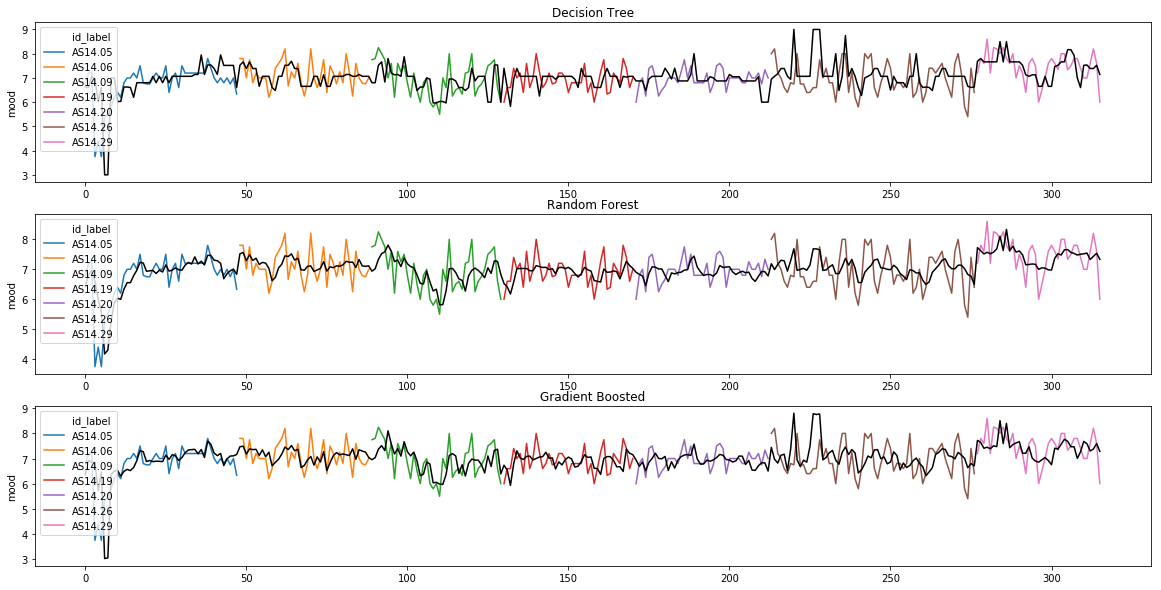

In [59]:
plt.rcParams['figure.figsize'] = [20, 10]
#sns.lineplot(y=y_test, x=range(len(y_test)))
#sns.lineplot(y=y_pred, x=range(len(y_pred)))
y_test_ids = pd.concat([y_test, df.iloc[y_test.index]['id_label']], axis=1)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.set_title("Decision Tree")
ax2.set_title("Random Forest")
ax3.set_title("Gradient Boosted")

a = [ax1, ax2, ax3]

for i, r in enumerate(results):
    sns.lineplot(x=range(y_test_ids.shape[0]), y='mood', hue='id_label' , data=y_test_ids, ax=a[i])
    sns.lineplot(data=pd.Series(results.prediction.loc[i]), color='black', size=0.1, ax=a[i])
    
plt.savefig('predictions.png')

## Benchmark model

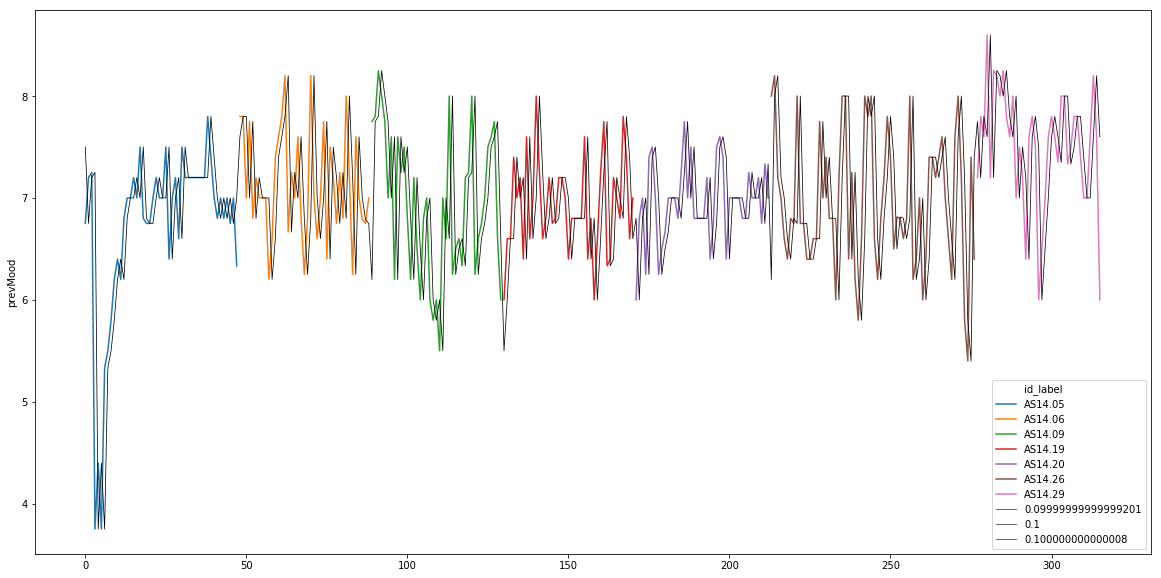

In [54]:
sns.lineplot(x=range(len(y_test)), y='mood', hue='id_label' , data=y_test_ids)
sns.lineplot(x=range(len(y_test)), y=df_testing['prevMood'], color='black', size=0.1)

In [55]:
mean_squared_error(y_test, df_testing['prevMood'])

0.49544167833100533